In [1]:
!pip install keras==2.2.4
!pip install tensorflow

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DMcF2gZ5unBMj9yhVdjgucfOzjo8HYXzWMIobha_Aio4',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizer-donotdelete-pr-wfczb5frgwqex7'
object_key = 'Fertilizers_Recommendation_ System_For_Disease_ Prediction.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
x_train = train_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train',target_size=(64,64),class_mode='categorical',batch_size=24)


Found 5384 images belonging to 6 classes.


In [7]:
x_test = train_datagen.flow_from_directory('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test',target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [8]:
x_train.class_indices


{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# Importing Libraries

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten

# Initializing Model

In [13]:
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(Dense(800,activation='relu'))
model.add(Dense(650,activation='relu'))

In [15]:
model.add(Dense(6,activation='softmax'))
len(x_train)

225

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 209s 924ms/step - loss: 0.6797 - accuracy: 0.7929 - val_loss: 0.2254 - val_accuracy: 0.9235
Epoch 2/10
225/225 [==============================] - 204s 905ms/step - loss: 0.2211 - accuracy: 0.9233 - val_loss: 0.1607 - val_accuracy: 0.9437
Epoch 3/10
225/225 [==============================] - 202s 897ms/step - loss: 0.1869 - accuracy: 0.9324 - val_loss: 0.1534 - val_accuracy: 0.9484
Epoch 4/10
225/225 [==============================] - 203s 900ms/step - loss: 0.1550 - accuracy: 0.9467 - val_loss: 0.1493 - val_accuracy: 0.9431
Epoch 5/10
225/225 [==============================] - 202s 899ms/step - loss: 0.1267 - accuracy: 0.9536 - val_loss: 0.1551 - val_accuracy: 0.9496
Epoch 6/10
225/225 [==============================] - 205s 911ms/step - loss: 0.1173 - accuracy: 0.9551 - val_loss: 0.1519 - val_accuracy: 0.9490
Epoch 7/10
225/225 [==============================] - 202s 898ms/step - loss: 0.1076 - accuracy: 0.9623 - val_loss: 0.0993 -

In [17]:
model.save('fruit_dataset.h5')

In [18]:
!tar -zcvf fruit-model.tgz fruit_dataset.h5

fruit_dataset.h5


In [19]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('fruit_dataset.h5')

In [20]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/7fc13d9f-316e-41ff-b216-5665c08357e6___RS_NLB 0784.JPG')

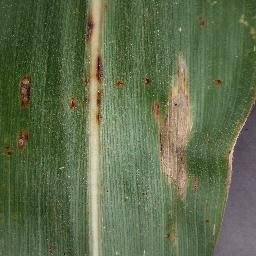

In [21]:
img

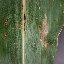

In [22]:
img=image.load_img('/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Corn_(maize)___Northern_Leaf_Blight/7fc13d9f-316e-41ff-b216-5665c08357e6___RS_NLB 0784.JPG',target_size=(64,64))
img

In [23]:
x=image.img_to_array(img)
x

array([[[ 82., 103.,  72.],
        [ 63.,  84.,  53.],
        [ 59.,  80.,  49.],
        ...,
        [ 55.,  78.,  34.],
        [ 55.,  78.,  36.],
        [ 57.,  79.,  43.]],

       [[ 51.,  72.,  41.],
        [ 54.,  75.,  44.],
        [ 63.,  84.,  53.],
        ...,
        [ 57.,  80.,  36.],
        [ 56.,  79.,  37.],
        [ 56.,  78.,  42.]],

       [[ 61.,  82.,  51.],
        [ 57.,  78.,  47.],
        [ 61.,  82.,  51.],
        ...,
        [ 66.,  89.,  45.],
        [ 63.,  86.,  44.],
        [ 68.,  90.,  54.]],

       ...,

       [[ 95., 109.,  76.],
        [ 83.,  98.,  69.],
        [ 80.,  99.,  71.],
        ...,
        [124., 117., 125.],
        [122., 115., 123.],
        [124., 117., 125.]],

       [[ 80.,  94.,  68.],
        [ 81.,  97.,  70.],
        [ 85., 101.,  75.],
        ...,
        [124., 117., 125.],
        [120., 113., 121.],
        [123., 116., 124.]],

       [[ 77.,  95.,  71.],
        [ 82.,  97.,  74.],
        [ 93., 1

In [24]:
x=np.expand_dims(x,axis=0)
x

array([[[[ 82., 103.,  72.],
         [ 63.,  84.,  53.],
         [ 59.,  80.,  49.],
         ...,
         [ 55.,  78.,  34.],
         [ 55.,  78.,  36.],
         [ 57.,  79.,  43.]],

        [[ 51.,  72.,  41.],
         [ 54.,  75.,  44.],
         [ 63.,  84.,  53.],
         ...,
         [ 57.,  80.,  36.],
         [ 56.,  79.,  37.],
         [ 56.,  78.,  42.]],

        [[ 61.,  82.,  51.],
         [ 57.,  78.,  47.],
         [ 61.,  82.,  51.],
         ...,
         [ 66.,  89.,  45.],
         [ 63.,  86.,  44.],
         [ 68.,  90.,  54.]],

        ...,

        [[ 95., 109.,  76.],
         [ 83.,  98.,  69.],
         [ 80.,  99.,  71.],
         ...,
         [124., 117., 125.],
         [122., 115., 123.],
         [124., 117., 125.]],

        [[ 80.,  94.,  68.],
         [ 81.,  97.,  70.],
         [ 85., 101.,  75.],
         ...,
         [124., 117., 125.],
         [120., 113., 121.],
         [123., 116., 124.]],

        [[ 77.,  95.,  71.],
       

In [25]:
y=np.argmax(model.predict(x),axis=1)
y

array([3])

In [26]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [27]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___healthy','Corn_(maize)___Northern_Leaf_Blight','Peach___Bacterial_spot','Peach___healthy']

In [28]:
index[y[0]]

'Corn_(maize)___Northern_Leaf_Blight'